# 1. Stats

In [239]:
# Load required libraries
import numpy as np
import pandas as pd

from KUtils.stat import statil
from KUtils.eda import data_preparation as dp

In [260]:
# Set decimal places precision to 3 digit (Gloabl effect)
pd.options.display.float_format = '{:,.3f}'.format

In [261]:
adult_income_df = pd.read_csv('cleaned.csv')

In [262]:
adult_income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,11.258,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,11.330,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,12.281,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,12.366,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,12.732,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,non_usa,<=50K


In [263]:
dp.fix_invalid_column_names(adult_income_df)

education-num Replaced with education_num
marital-status Replaced with marital_status
capital-gain Replaced with capital_gain
capital-loss Replaced with capital_loss
hours-per-week Replaced with hours_per_week
native-country Replaced with native_country


In [264]:
adult_income_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,11.258,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,11.330,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,12.281,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,12.366,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,12.732,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,non_usa,<=50K


In [281]:
adult_income_df.query("age<39 and education ==' Bachelors' and target==' >50K' and occupation==' Sales' and education_num<20 and sex==' Male' and relationship==' Own-child'")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
14296,34,Private,11.811,Bachelors,13,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,>50K
25926,35,Self-emp-inc,12.138,Bachelors,13,Married-civ-spouse,Sales,Own-child,White,Male,5178,0,50,United-States,>50K


In [257]:
import importlib
importlib.reload(dp)

<module 'KUtils.eda.data_preparation' from 'D:\\projects\\datascience\\kesh-utils\\KUtils\\eda\\data_preparation.py'>

In [252]:
# Skewness check on continuous features (Auto detects continuous variables)
skew_df = statil.analyse_skew(adult_income_df)


Skew in numerical features: 

                 Skew
capital-gain   11.785
capital-loss    4.514
age             0.532
hours-per-week  0.332
education-num  -0.310
fnlwgt         -0.840


In [253]:
# Transform skewed data to normal distribution (With absolute skew cutoff>0.75)
dp.transform_continuous_by_boxcox(df=adult_income_df, lambda_value=0.15, skewness_threshold=0.75)


Skew in numerical features: 

                 Skew
capital-gain   11.785
capital-loss    4.514
age             0.532
hours-per-week  0.332
education-num  -0.310
fnlwgt         -0.840
Transforming capital-gain using coxbox1p
Transforming capital-loss using coxbox1p
Transforming fnlwgt using coxbox1p


In [235]:
# Running stat test on individual categorical vearible (Here sex is the feature to examine)
statil.binary_target_run_stat_test(df=adult_income_df, feature_to_examine='sex', target_feature_name='target')

Running stats on sex
  Chi statistics is 1440.421 and  p value is 0.000
	Rejecting null hypothesis that sex is not significant.
	So Feature has significance and prdective power
----------------------------------------------------------------------------------------------------------


Running stats on age ($\mu=$ = 38.44 and $\sigma=$ 13.12)


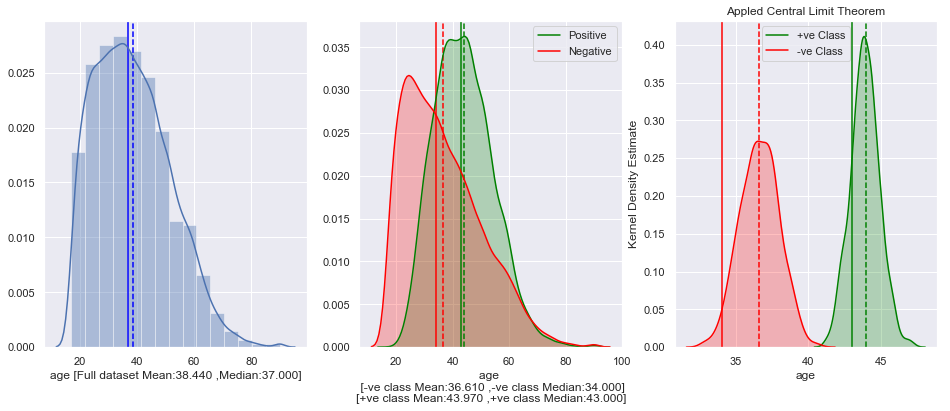

Normal Test for the feature age distribution chi_stat=1307.554 p-value=0.000
	Low p-value(<0.05) indicates it is unlikely that data came from a normal distribution.(NOT Normal)
Note: Skewness Interpretation:- Fairly symmetrical if the skewness is between -0.5 and 0.5
	Skewness for the Full dataset 0.532.
	  Right skewed
	    data NOT symmetrical
	Skewness for the Negative dataset 0.740.
	  Right skewed
	    data NOT symmetrical
	Skewness for the Positive dataset 0.459.
	  Right skewed
	    Data seems to be fairly symmetrical
Ttest_ind: t=43.795 p=0.000
Rejecting null hypothesis that there is no difference in Mean of +ve and -ve Class.(Go for alternative hypothesis)
	The feature age would be a predictive feature. Count it as important feature
----------------------------------------------------------------------------------------------------------


In [256]:
# Running stat test on individual continuous vearible (Here age is the feature to examine)
statil.binary_target_run_stat_test(df=adult_income_df, feature_to_examine='age', target_feature_name='target')

Running stats on workclass
  Chi statistics is 825.271 and  p value is 0.000
	Rejecting null hypothesis that workclass is not significant.
	So Feature has significance and prdective power
----------------------------------------------------------------------------------------------------------
Running stats on education
  Chi statistics is 4133.450 and  p value is 0.000
	Rejecting null hypothesis that education is not significant.
	So Feature has significance and prdective power
----------------------------------------------------------------------------------------------------------
Running stats on marital-status
  Chi statistics is 6164.230 and  p value is 0.000
	Rejecting null hypothesis that marital-status is not significant.
	So Feature has significance and prdective power
----------------------------------------------------------------------------------------------------------
Running stats on occupation
  Chi statistics is 3744.899 and  p value is 0.000
	Rejecting null hypothes

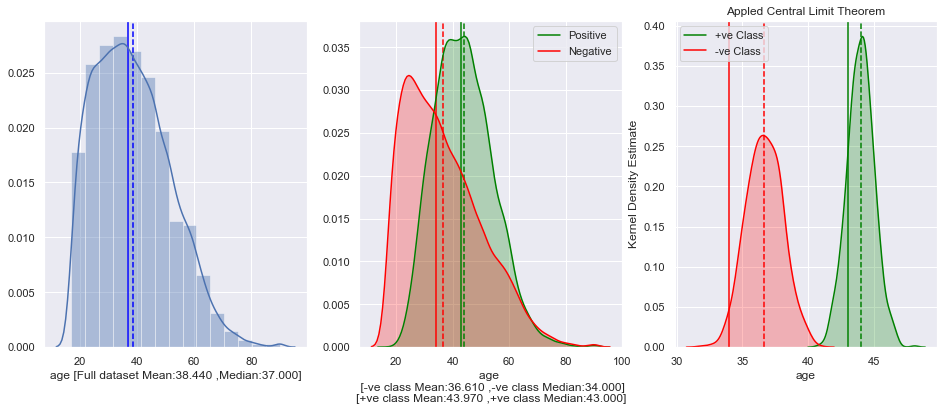

Normal Test for the feature age distribution chi_stat=1307.554 p-value=0.000
	Low p-value(<0.05) indicates it is unlikely that data came from a normal distribution.(NOT Normal)
Note: Skewness Interpretation:- Fairly symmetrical if the skewness is between -0.5 and 0.5
	Skewness for the Full dataset 0.532.
	  Right skewed
	    data NOT symmetrical
	Skewness for the Negative dataset 0.740.
	  Right skewed
	    data NOT symmetrical
	Skewness for the Positive dataset 0.459.
	  Right skewed
	    Data seems to be fairly symmetrical
Ttest_ind: t=43.795 p=0.000
Rejecting null hypothesis that there is no difference in Mean of +ve and -ve Class.(Go for alternative hypothesis)
	The feature age would be a predictive feature. Count it as important feature
----------------------------------------------------------------------------------------------------------
Running stats on fnlwgt (mu = 3.13 and sigma = 0.07)


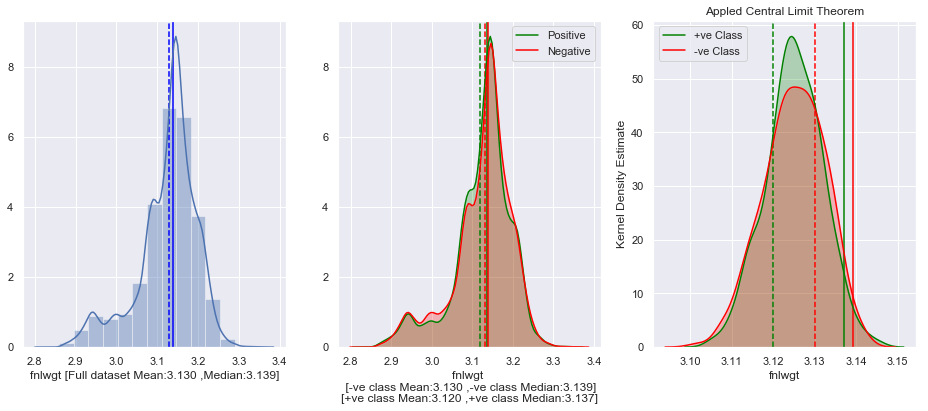

Normal Test for the feature fnlwgt distribution chi_stat=4161.895 p-value=0.000
	Low p-value(<0.05) indicates it is unlikely that data came from a normal distribution.(NOT Normal)
Note: Skewness Interpretation:- Fairly symmetrical if the skewness is between -0.5 and 0.5
	Skewness for the Full dataset -0.975.
	  Left skewed
	    data NOT symmetrical
	Skewness for the Negative dataset -0.964.
	  Left skewed
	    data NOT symmetrical
	Skewness for the Positive dataset -1.012.
	  Left skewed
	    data NOT symmetrical
Ttest_ind: t=-0.173 p=0.862
Cannot Reject null hypothesis that there is no difference in Mean of +ve and -ve Class
	The feature fnlwgt may NOT be important or has any predictive power
----------------------------------------------------------------------------------------------------------
Running stats on education-num (mu = 10.13 and sigma = 2.56)


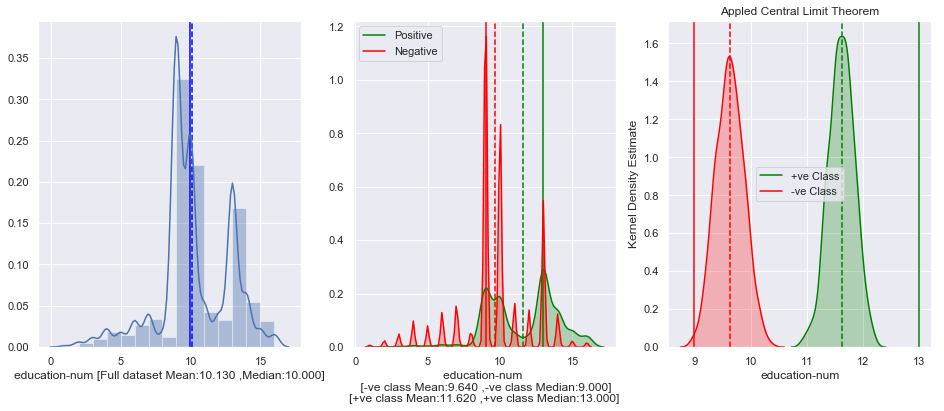

Normal Test for the feature education-num distribution chi_stat=772.887 p-value=0.000
	Low p-value(<0.05) indicates it is unlikely that data came from a normal distribution.(NOT Normal)
Note: Skewness Interpretation:- Fairly symmetrical if the skewness is between -0.5 and 0.5
	Skewness for the Full dataset -0.310.
	  Left skewed
	    Data seems to be fairly symmetrical
	Skewness for the Negative dataset -0.433.
	  Left skewed
	    Data seems to be fairly symmetrical
	Skewness for the Positive dataset -0.316.
	  Left skewed
	    Data seems to be fairly symmetrical
Ttest_ind: t=62.237 p=0.000
Rejecting null hypothesis that there is no difference in Mean of +ve and -ve Class.(Go for alternative hypothesis)
	The feature education-num would be a predictive feature. Count it as important feature
----------------------------------------------------------------------------------------------------------
Running stats on capital-gain (mu = 1.58 and sigma = 5.34)


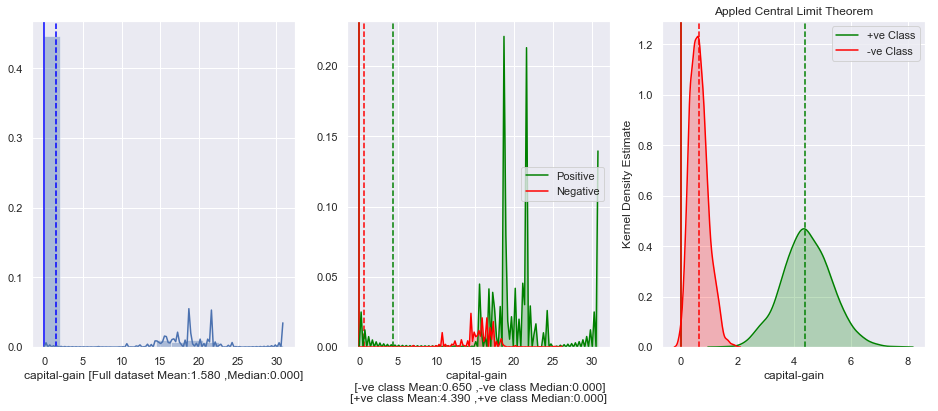

Normal Test for the feature capital-gain distribution chi_stat=20387.595 p-value=0.000
	Low p-value(<0.05) indicates it is unlikely that data came from a normal distribution.(NOT Normal)
Note: Skewness Interpretation:- Fairly symmetrical if the skewness is between -0.5 and 0.5
	Skewness for the Full dataset 3.295.
	  Right skewed
	    data NOT symmetrical
	Skewness for the Negative dataset 4.712.
	  Right skewed
	    data NOT symmetrical
	Skewness for the Positive dataset 1.580.
	  Right skewed
	    data NOT symmetrical
Ttest_ind: t=55.765 p=0.000
Rejecting null hypothesis that there is no difference in Mean of +ve and -ve Class.(Go for alternative hypothesis)
	The feature capital-gain would be a predictive feature. Count it as important feature
----------------------------------------------------------------------------------------------------------
Running stats on capital-loss (mu = 0.66 and sigma = 2.96)


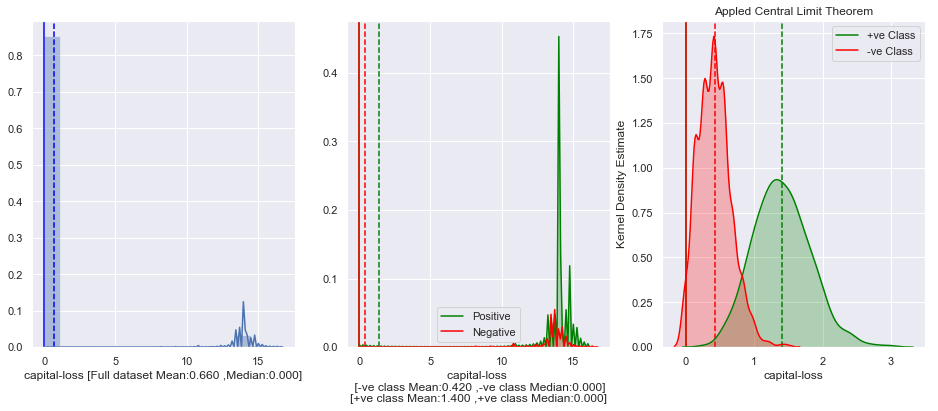

Normal Test for the feature capital-loss distribution chi_stat=25801.439 p-value=0.000
	Low p-value(<0.05) indicates it is unlikely that data came from a normal distribution.(NOT Normal)
Note: Skewness Interpretation:- Fairly symmetrical if the skewness is between -0.5 and 0.5
	Skewness for the Full dataset 4.270.
	  Right skewed
	    data NOT symmetrical
	Skewness for the Negative dataset 5.493.
	  Right skewed
	    data NOT symmetrical
	Skewness for the Positive dataset 2.691.
	  Right skewed
	    data NOT symmetrical
Ttest_ind: t=25.312 p=0.000
Rejecting null hypothesis that there is no difference in Mean of +ve and -ve Class.(Go for alternative hypothesis)
	The feature capital-loss would be a predictive feature. Count it as important feature
----------------------------------------------------------------------------------------------------------
Running stats on hours-per-week (mu = 40.95 and sigma = 11.99)


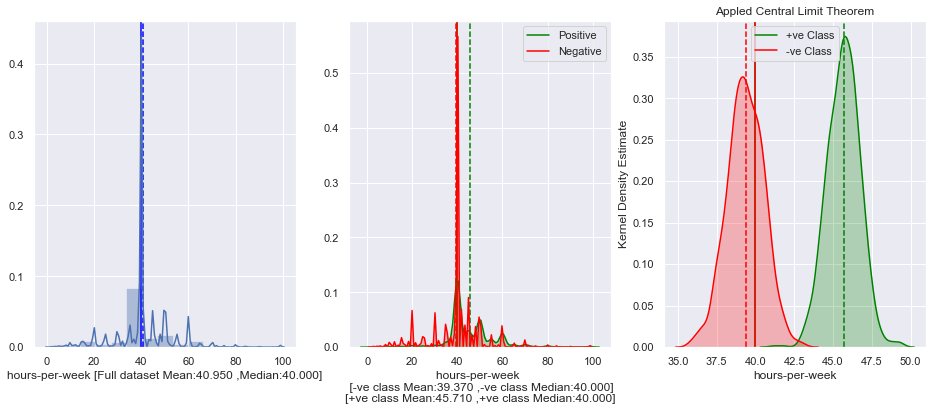

Normal Test for the feature hours-per-week distribution chi_stat=2814.625 p-value=0.000
	Low p-value(<0.05) indicates it is unlikely that data came from a normal distribution.(NOT Normal)
Note: Skewness Interpretation:- Fairly symmetrical if the skewness is between -0.5 and 0.5
	Skewness for the Full dataset 0.332.
	  Right skewed
	    Data seems to be fairly symmetrical
	Skewness for the Negative dataset 0.300.
	  Right skewed
	    Data seems to be fairly symmetrical
	Skewness for the Positive dataset 0.849.
	  Right skewed
	    data NOT symmetrical
Ttest_ind: t=41.144 p=0.000
Rejecting null hypothesis that there is no difference in Mean of +ve and -ve Class.(Go for alternative hypothesis)
	The feature hours-per-week would be a predictive feature. Count it as important feature
----------------------------------------------------------------------------------------------------------
Stat summary info on prective power of each feature
           Feature is_important  chi_or_T_val
0     

In [254]:
# For running on all features use below
statil.binary_target_run_full_stat_test(df=adult_income_df, target_feature_name='target', p_value_cutoff=0.05)